In [5]:
# Import packages!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
import sys
import joblib

In [2]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# -----Path to snow-cover-mapping-application
# RAINEY'S PATH
# base_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/'
#base_path = 'drive/MyDrive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/'

# ALEXANDRA'S PATH
base_path = '/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application'

# -----Path to ELA_training_data.csv
# RAINEY'S PATH
path_to_folder = os.path.join(base_path, 'inputs-outputs')
# ALEXANDRA'S PATH
# path_to_folder = ('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')


# -----Path where output figures will be saved
figures_out_path = os.path.join(base_path, '..', 'figures')


In [ ]:
#os.listdir('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping/inputs-outputs')
os.listdir('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/')

In [21]:
# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns

fn = 'ELA_training_data.csv'  # file name
# fn = ('Totalsite_terrainparameters.csv') # <--This file doesn't have snow cover observations, just terrain parameters
df = pd.read_csv(os.path.join(path_to_folder, fn))

# Display the DataFrame
df


,site_name,datetime,snowlines_coords_X,snowlines_coords_Y,HorizontalCRS,VerticalCRS,snowline_elevs_m,snowline_elevs_median_m,SCA_m2,AAR,ELA_from_AAR_m,dataset,geometry,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,glacier_outline,CRS,HorizontalReference,VerticalReference,study_site
0,Blue,2017-09-28T13:19:53,"[448333.69516140706, 448328.68107815855, 44832...","[5294435.935183713, 5294440.949266962, 5294445...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1966.4131146157317, 1961.951334851081, 1969.0...",1744.4713,2527478.0,0.430286,1980.0,Sentinel-2_TOA,LINESTRING (448333.69516140706 5294435.9351837...,-123.69570,47.80982,2,4,5.663,1252,2371,1880,17.7,19,4616,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
1,Blue,2016-09-27T13:08:14,"[448998.5091932549, 449013.54111762665, 449058...","[5296286.811462927, 5296271.779538555, 5296166...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1560.9210390147555, 1560.9210390147555, 1574....",1763.2753,1581711.2,0.368034,2039.0,Landsat,LINESTRING (448998.5091932549 5296286.81146292...,-123.69570,47.80982,2,4,5.663,1252,2371,1880,17.7,19,4616,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
2,Blue,2018-10-13T13:20:21,"[448268.5120791764, 448258.48391267937, 448253...","[5294380.780267979, 5294380.780267979, 5294385...",EPSG:32610,EGM96 geoid (EPSG:5773),"[2027.3465551065644, 2030.1171467398906, 2030....",1962.0972,2279688.0,0.388101,2026.0,Sentinel-2_TOA,LINESTRING (448268.5120791764 5294380.78026797...,-123.69570,47.80982,2,4,5.663,1252,2371,1880,17.7,19,4616,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
3,Blue,2019-08-29T13:21:17,"[448519.2162416019, 448509.1880751049, 448504....","[5294461.005599955, 5294461.005599955, 5294466...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1879.80322536625, 1883.1595878348567, 1878.96...",1929.1422,2530997.8,0.430885,1979.0,Sentinel-2_SR,LINESTRING (448519.2162416019 5294461.00559995...,-123.69570,47.80982,2,4,5.663,1252,2371,1880,17.7,19,4616,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
4,Blue,2022-10-02T13:21:11,"[448830.0894030095, 448820.0612365125, 448815....","[5294260.442270015, 5294260.442270015, 5294265...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1865.4368260658425, 1866.7513349668682, 1866....",2002.0227,2216031.0,0.377607,2033.0,Sentinel-2_SR,LINESTRING (448830.0894030095 5294260.44227001...,-123.69570,47.80982,2,4,5.663,1252,2371,1880,17.7,19,4616,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,SouthCascade,2019-07-22 13:11:13,"[644215.0, 644205.0, 644200.0, 644200.0, 64420...","[5358060.0, 5358060.0, 5358065.0, 5358075.0, 5...",NaN,NaN,"[1785.0, 1783.0, 1783.0, 1783.0, 1782.0, 1780....",1781.5000,1550100.0,0.861454,NaN,Sentinel-2_SR,"LINESTRING (644215 5358060, 644205 5358060, 64...",-121.05735,48.35698,2,4,2.924,1613,2196,1891,12.8,350,3338,0,0,0,0,0,POLYGON ((-121.07246183899997 48.3568376590000...,EPSG:32610,NaN,NaN,NaN
766,SouthCascade,2018-07-24 18:00:00,"[643716.0, 643716.0, 643716.0, 643717.5, 64371...","[5358373.5, 5358370.5, 5358367.5, 5358366.0, 5...",NaN,NaN,"[1738.0, 1739.0, 1739.0, 1739.0, 1740.0, 1740....",1757.0000,1690065.0,0.939122,NaN,PlanetScope,"LINESTRING (643716 5358373.5, 643716 5358370.5...",-121.05735,48.35698,2,4,2.924,1613,2196,1891,12.8,350,3338,0,0,0,0,0,POLYGON ((-121.07246183899997 48.3568376590000...,EPSG:32610,NaN,NaN,NaN
767,SouthCascade,2020-07-26 13:11:14,"[643715.0, 643710.0, 643710.0, 643705.0, 64370...","[5358250.0, 5358255.0, 5358265.0, 5358270.0, 5...",NaN,NaN,"[1764.0, 1764.0, 1765.0, 1765.0, 1765.0, 1763....",1747.0000,1746500.0,0.970008,NaN,Sentinel-2_TOA,"LINESTRING (643715 5358250, 643710 5358255, 64...",-121.05735,48.35698,2,4,2.924,1613,2196,1891,12.8,350,3338,0,0,0,0,0,POLYGON 

In [18]:
fn = 'ELA_training_data.csv'  # file name
# fn = ('Totalsite_terrainparameters.csv') # <--This file doesn't have snow cover observations, just terrain parameters
df = pd.read_csv(os.path.join(path_to_folder, fn))
aar_column = df['AAR']

print(aar_column)


0      0.430286
1      0.368034
2      0.388101
3      0.430885
4      0.377607
         ...   
765    0.861454
766    0.939122
767    0.970008
768    0.557412
769    0.904754
Name: AAR, Length: 770, dtype: float64


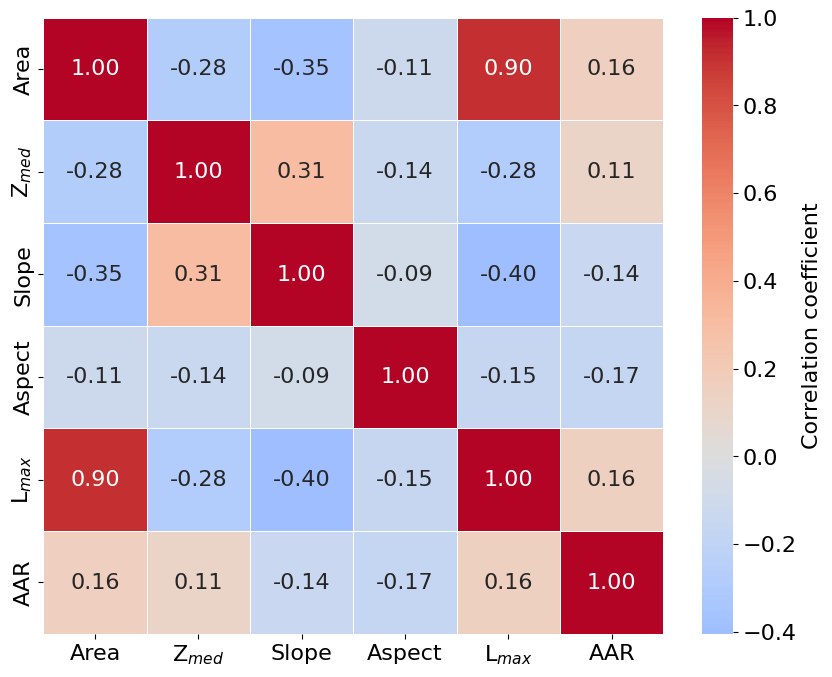

In [8]:
fn = 'ELA_training_data.csv'  # file name
file_path = os.path.join(path_to_folder, fn)
df = pd.read_csv(file_path)

parameters = ['Area', 'Zmed', 'Slope', 'Aspect', 'Lmax','AAR']
parameters_display = [x.replace('min', '$_{min}$').replace('med', '$_{med}$').replace('max', '$_{max}$') for x in parameters]
correlation_matrix = df[parameters].corr()


plt.rcParams.update({'font.size':16})
fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center = 0,
            fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation coefficient'})
plt.gca().set_xticklabels(parameters_display)
plt.gca().set_yticklabels(parameters_display)

# plt.title('Correlation Matrix of AAR and Glacier Terrain Parameters')
plt.show()

#Represents the strength of the correlation, where blue is a negative correlation and red is a positive correlation. The intensity of the color denotes
#the strength of the correlation, shown by the bar.

# save figure
#fig_fn = os.path.join(figures_out_path, 'correlation_matrix_AAR_terrain_params.png')
#fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
#print('figure saved to file: ' + fig_fn)

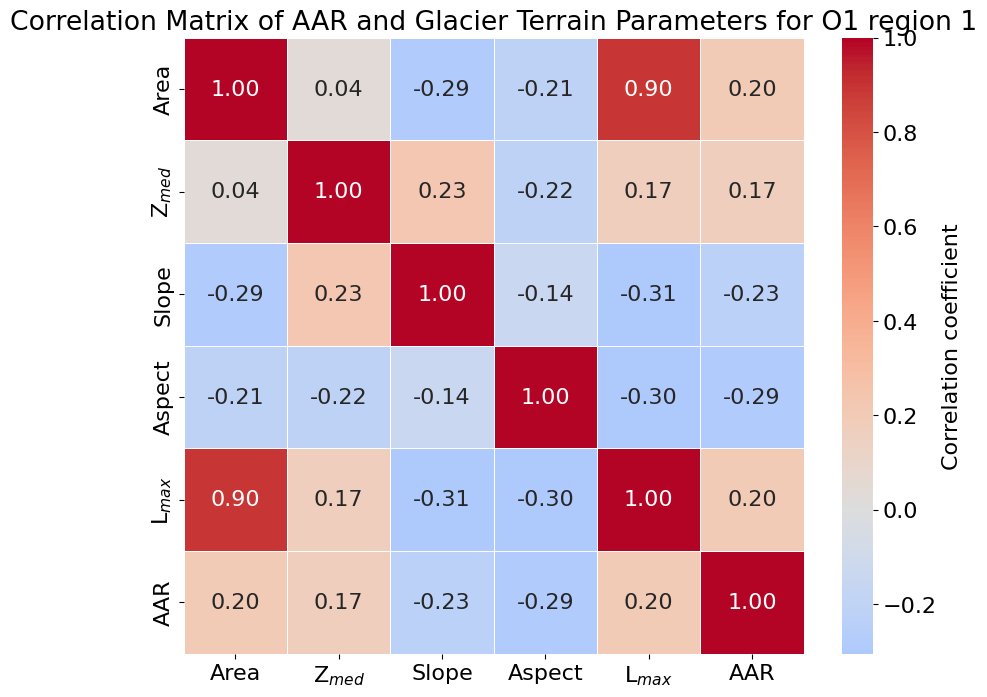

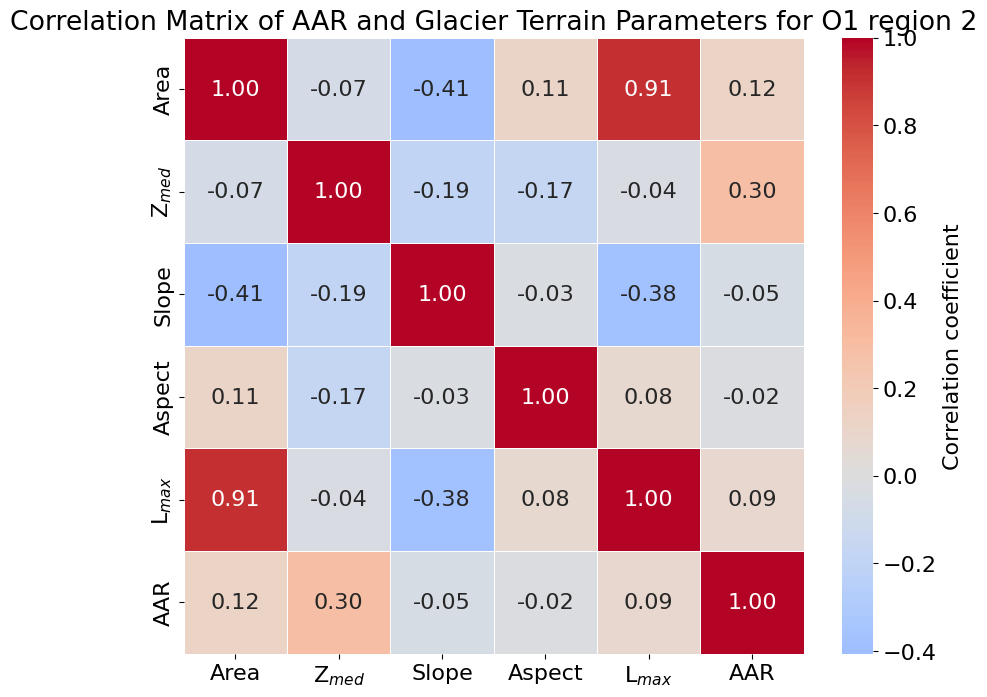

In [31]:
fn = 'ELA_training_data.csv'  # file name


parameters = ['Area', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'AAR']
parameters_display = [x.replace('min', '$_{min}$').replace('med', '$_{med}$').replace('max', '$_{max}$') for x in parameters]


grouped = df.groupby('O1Region') #Distinguish by subregion:
for name, group in grouped:
    correlation_matrix = group[parameters].corr()

    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation coefficient'})
    plt.gca().set_xticklabels(parameters_display)
    plt.gca().set_yticklabels(parameters_display)
    plt.title(f'Correlation Matrix of AAR and Glacier Terrain Parameters for O1 region {name}')
    plt.show()

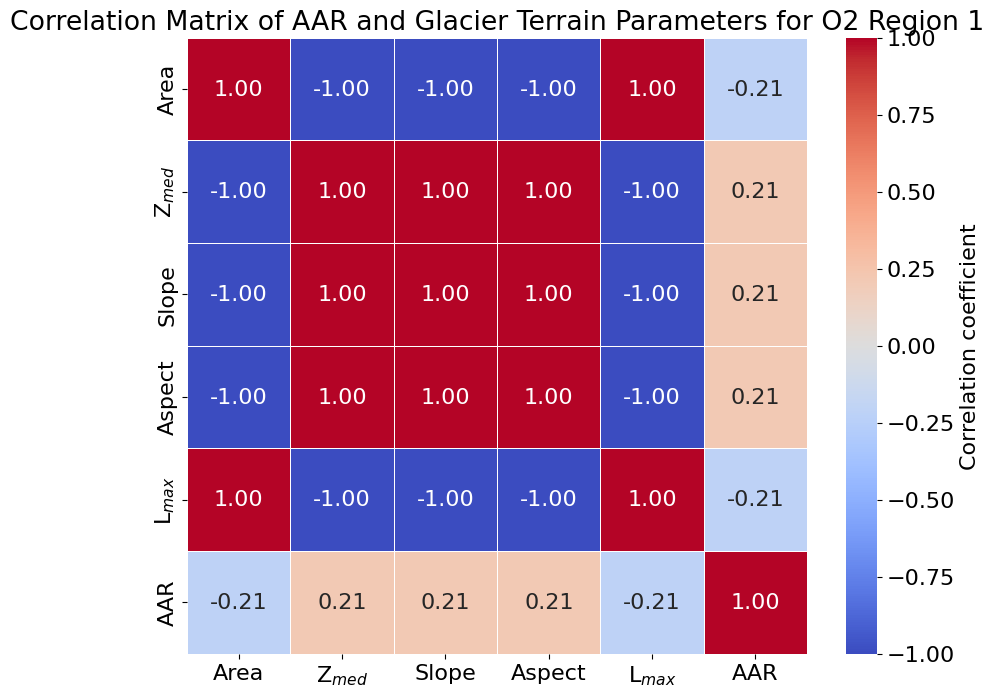

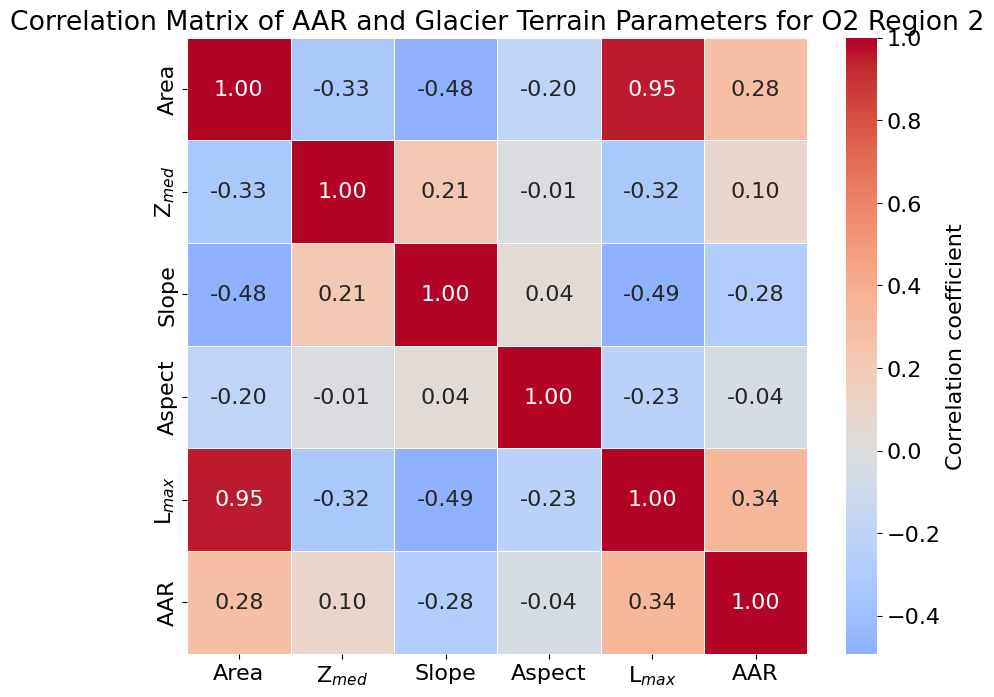

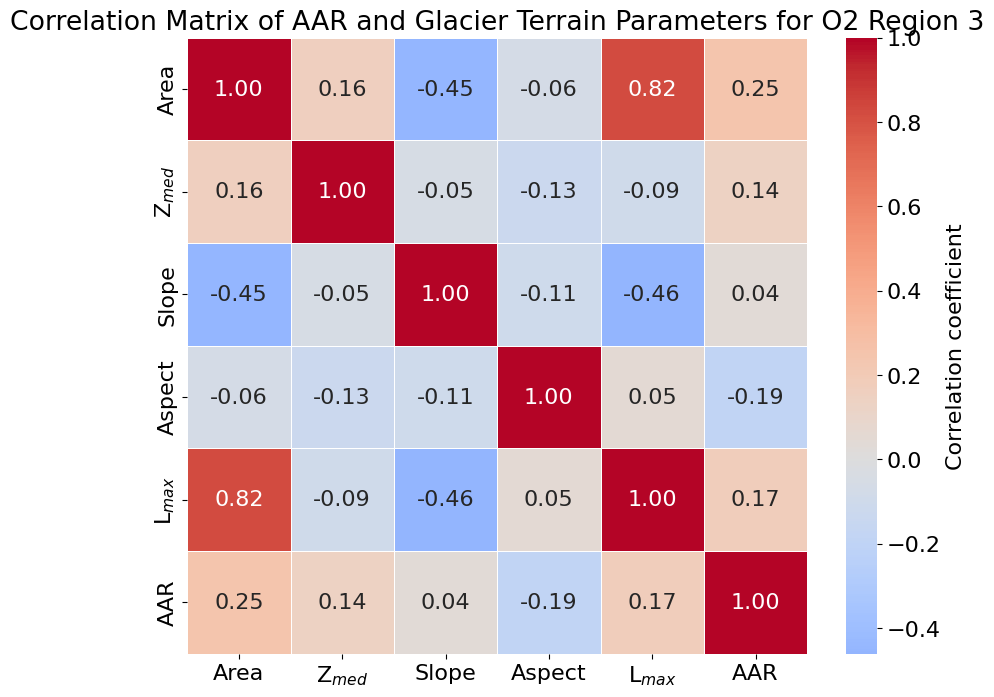

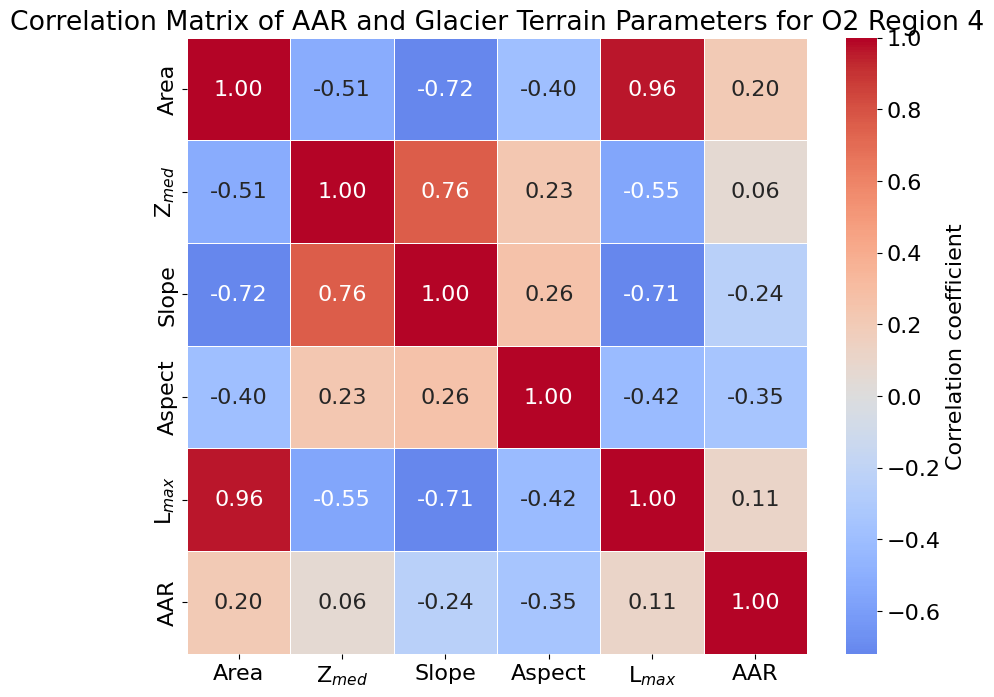

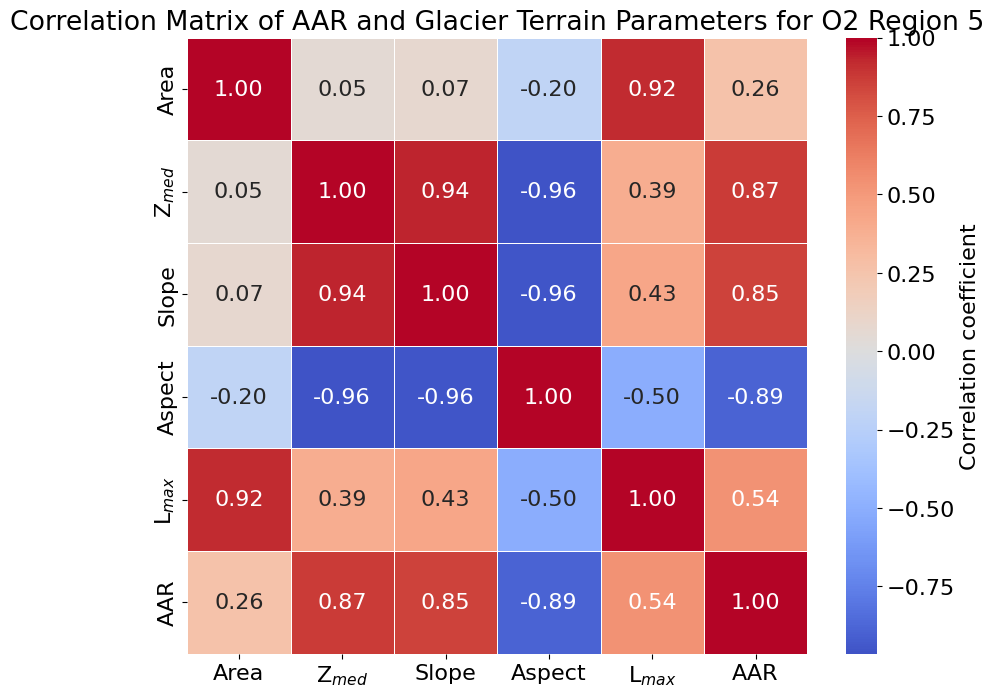

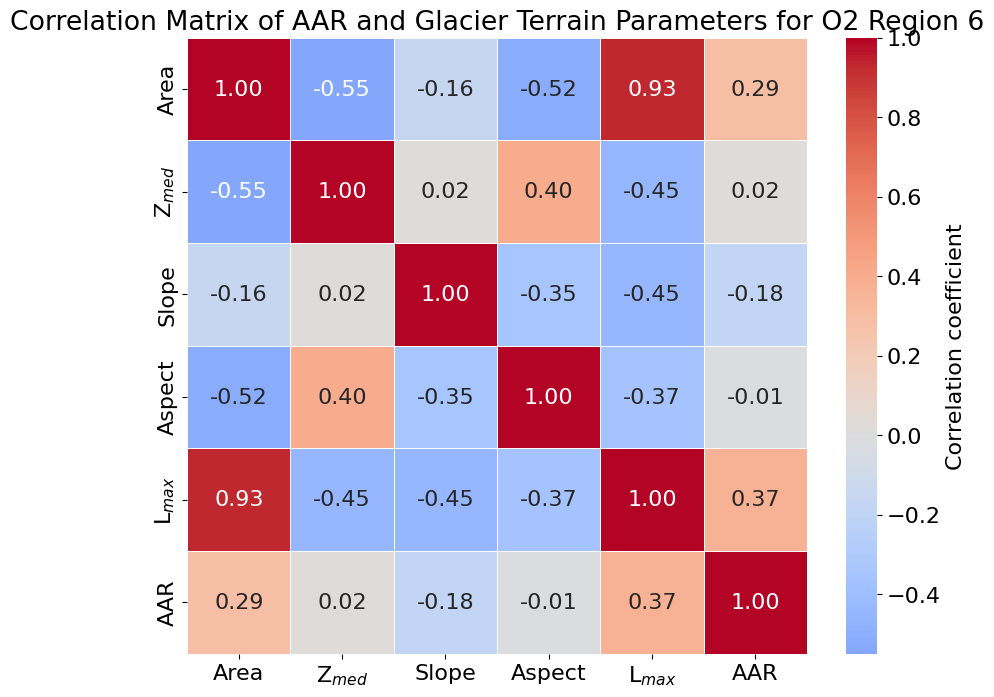

In [36]:
fn = 'ELA_training_data.csv'  # file name


parameters = ['Area', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'AAR']
parameters_display = [x.replace('min', '$_{min}$').replace('med', '$_{med}$').replace('max', '$_{max}$') for x in parameters]


grouped = df.groupby('O2Region') #Distinguish by subregion:
for name, group in grouped:
    correlation_matrix = group[parameters].corr()

    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation coefficient'})
    plt.gca().set_xticklabels(parameters_display)
    plt.gca().set_yticklabels(parameters_display)
    plt.title(f'Correlation Matrix of AAR and Glacier Terrain Parameters for O2 Region {name}')
    plt.show()


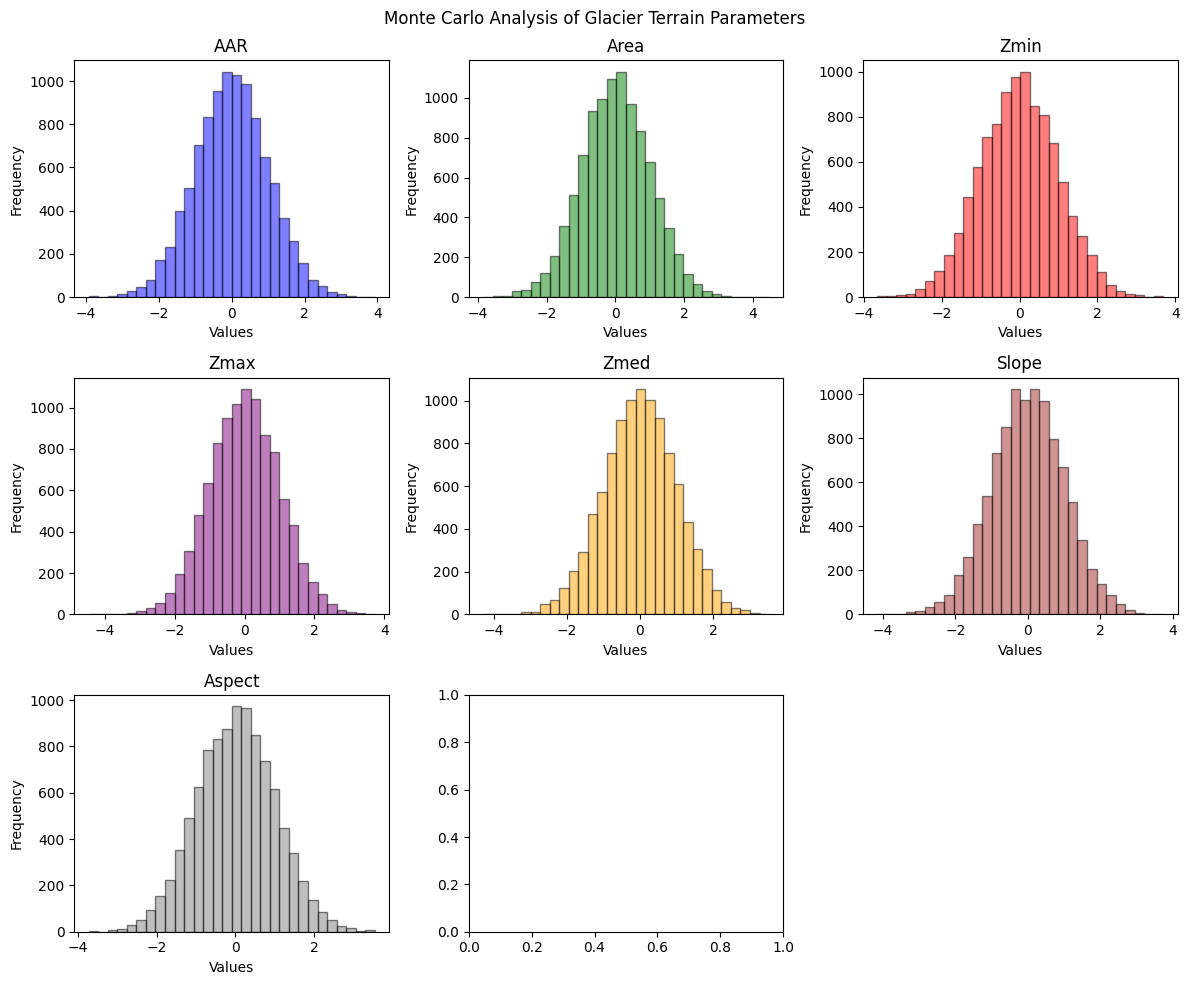

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)  # Setting seed for reproducibility

num_samples = 10000
parameters = ['AAR', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

data = {param: np.random.randn(num_samples) for param in parameters}
df = pd.DataFrame(data)

num_params = len(parameters)
num_cols = 3
num_rows = num_params // num_cols + (num_params % num_cols > 0)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))
axs = axs.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'gray']

for i, (param, color) in enumerate(zip(parameters, colors)):
    ax = axs[i]
    ax.hist(df[param], bins=30, alpha=0.5, color=color, edgecolor='black')
    ax.set_title(param)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for j in range(num_params, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.suptitle('Monte Carlo Analysis of Glacier Terrain Parameters', y=0.98)
plt.tight_layout()
plt.show()


## Calculate correlation matrix for AAR and terrain parameters

## Try including climate data in the correlation calculations

<ipython-input-75-289c76cbea62>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_restruct = data_restruct.groupby(data_restruct.index.to_period("M")).mean()
<ipython-input-75-289c76cbea62>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_restruct = data_restruct.groupby(data_restruct.index.to_period("M")).mean()
<ipython-input-75-289c76cbea62>:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ela_df_site =

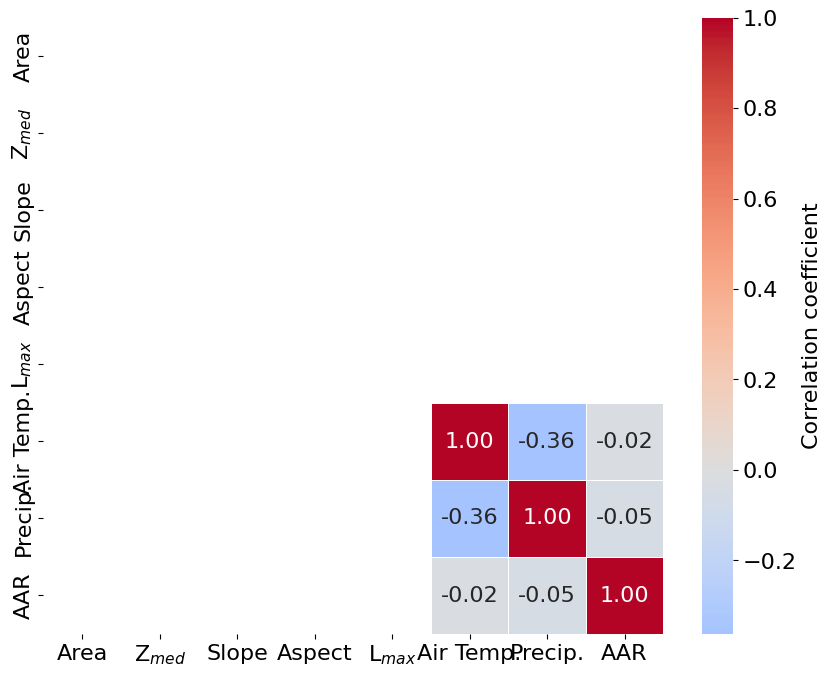

In [ ]:
# Load ELA training data
ela_fn = 'ELA_training_data.csv'  # file name
ela_file_path = os.path.join(path_to_folder, ela_fn)
ela_df = pd.read_csv(ela_file_path)
# format datetimes as pandas.datetime objects
ela_df['datetime'] = pd.to_datetime(ela_df['datetime'])
# resample on a monthly basis
ela_df.index = ela_df['datetime']

# Load met data
temp_fn = '2m_air_temperature_anomaly_time_series_AK.csv'
temp_file_path = os.path.join(base_path, '..', temp_fn)
temp_df = pd.read_csv(temp_file_path)
precip_fn = 'Precip_time_series_AK.csv'
precip_file_path = os.path.join(base_path, '..', precip_fn)
precip_df = pd.read_csv(precip_file_path)

# Restructure met data
def restructure_met_df(data, data_name):
    data['Year'] = data['Year'].astype(str)
    data_restruct = pd.DataFrame()
    columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # iterate over month columns
    for i, column in enumerate(columns):
        # grab month number
        if i+1 < 10:
            month = '0' + str(i+1)
        else:
            month = str(i+1)
        # grab dates and precipitation values for month
        dates = [np.datetime64(year + '-' + month + '-15') for year in data['Year'].values]
        data_values = data[column].values
        # compile into dataframe
        df = pd.DataFrame({'datetime': dates, data_name: data_values})
        # concatenate to full dataframe
        data_restruct = pd.concat([data_restruct, df])
    # Remove no data values
    data_restruct = data_restruct.drop(data_restruct[data_restruct[data_name] <= -999].index)
    # Sort by date
    data_restruct.sort_values(by='datetime', inplace=True)
    # Resample on a monthly basis
    data_restruct.index = data_restruct['datetime']
    data_restruct = data_restruct.groupby(data_restruct.index.to_period("M")).mean()

    return data_restruct
temp_df = restructure_met_df(temp_df, 'Air Temp.')
precip_df = restructure_met_df(precip_df, 'Precip.')

# define parameters to calculate correlation coefficients
parameters = ['Area', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'Air Temp.', 'Precip.', 'AAR']
parameters_display = [x.replace('min', '$_{min}$').replace('med', '$_{med}$').replace('max', '$_{max}$') for x in parameters]

# Grab all unique site names in ela_df
unique_site_names = ela_df['site_name'].drop_duplicates().values

# Iterate over site names
correlation_matrix = np.zeros((len(parameters), len(parameters), len(unique_site_names)))
for i, site_name in enumerate(unique_site_names):
    # subset ela_df to site
    ela_df_site = ela_df.loc[ela_df['site_name']==site_name]
    # resample monthly
    ela_df_site = ela_df_site.groupby(ela_df_site.index.to_period("M")).mean()
    # Concatenate all dataframes
    temp_df_idx = [temp_df.index.get_loc(dt, method='nearest') for dt in ela_df_site.index.values]
    temp_df_subset = temp_df.iloc[temp_df_idx]
    precip_df_idx = [precip_df.index.get_loc(dt, method='nearest') for dt in ela_df_site.index.values]
    precip_df_subset = precip_df.iloc[precip_df_idx]
    ela_df_site['Air Temp.'] = temp_df_subset['Air Temp.'].values
    ela_df_site['Precip.'] = precip_df_subset['Precip.'].values
    # calculate correlation matrix
    correlation_matrix[:,:,i] = ela_df_site[parameters].corr()

# Calculate mean for all correlation matrices
correlation_matrix_mean = np.nanmean(correlation_matrix, axis=2)
correlation_matrix_mean

plt.rcParams.update({'font.size':16})
fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', center = 0,
            fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation coefficient'})
plt.gca().set_xticklabels(parameters_display)
plt.gca().set_yticklabels(parameters_display)
# plt.title('Correlation Matrix of AAR and Glacier Terrain Parameters')
plt.show()

#Represents the strength of the correlation, where blue is a negative correlation and red is a positive correlation. The intensity of the color denotes
#the strength of the correlation, shown by the bar.

# save figure
#fig_fn = os.path.join(figures_out_path, 'correlation_matrix_AAR_terrain_params.png')
#fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
#print('figure saved to file: ' + fig_fn)

In [ ]:
correlation_matrix

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [ ]:

fn = 'ELA_training_data.csv'  # file name


# Select parameters for correlation matrix
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'AAR']
correlation_matrix = df[parameters].corr()

# Set the threshold for strong correlations
threshold = 0.7  # You can adjust this threshold as needed

# Filter the correlation matrix to highlight strong correlations
strong_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Create a mask to display only the strong correlations
mask = strong_correlations.isnull()

# Create the heatmap with highlighted strong correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5, mask=mask)
plt.title(f'Strong Correlations (>|{threshold}|) Matrix of Glacier Terrain Parameters')
plt.show()







In [ ]:

fn = 'ELA_training_data.csv'  # file name


# Select parameters for correlation matrix
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'AAR']
correlation_matrix = df[parameters].corr()

# Set the threshold for strong correlations
threshold = 0.7  # You can adjust this threshold as needed

# Filter the correlation matrix to highlight strong correlations excluding 1.0
strong_correlations = correlation_matrix[((correlation_matrix >= threshold) | (correlation_matrix <= -threshold)) & (correlation_matrix != 1.0)]

# Create a mask to display only the strong correlations
mask = strong_correlations.isnull()

# Create the heatmap with highlighted strong correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5, mask=mask)
plt.title(f'Strong Correlations (>|{threshold}|) Matrix of Glacier Terrain Parameters (excluding 1.0)')
plt.show()


In [ ]:
!pip install pykrige

In [ ]:
import pandas as pd
from scipy.stats import kstest, norm
import os

fn = 'ELA_training_data.csv'  # file name

# Parameters to analyze
parameters = ['AAR','Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

for param in parameters:
    data = df[param]
    data = data.dropna()  # Remove NaN values

    if not data.empty:
        # Perform Kolmogorov-Smirnov test
        ks_statistic, p_value = kstest(data, 'norm')

        print(f"Parameter: {param}")
        print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05  # Significance level
        if p_value < alpha:
            print("Null hypothesis (data comes from a normal distribution) rejected.\n")
        else:
            print("Fail to reject the null hypothesis (data comes from a normal distribution).\n")
    else:
        print(f"No valid data for parameter: {param}\n")


#This result indicates that the data being analyzed for the parameter "AAR" does not follow a normal distribution.
#The Kolmogorov-Smirnov test statistic of 0.518 and an extremely low p-value of 9.11e-193 strongly reject the null hypothesis,
#which assumes that the data is normally distributed. Therefore, based on this statistical test, it's evident that the data significantly
#deviates from a normal distribution for the given parameter.


In [ ]:
#Identify outliers:

fn = 'ELA_training_data.csv'  # file name

parameters = ['AAR','Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

# Calculate and identify outliers using z-scores
outliers = {}
for param in parameters:
    data = df[param]
    z_scores = (data - data.mean()) / data.std()
    outliers[param] = df.loc[abs(z_scores) > 3, 'site_name']

for param, outliers_list in outliers.items():
    print(f"Outliers for {param}:")
    if outliers_list.empty:
        print("No outliers")
    else:
        print(outliers_list.to_string(index=False))
    print()

